# Lectura de datos

## Archivos TXT
Hasta ahora, usamos la función *print* para mostrar los datos en la pantalla. Pero hay muchas formas de almacenar datos en su disco y compartirlos con otros programas o colegas. Por ejemplo, si tengo algunas cadenas en este cuaderno, pero quiero usarlas en otro cuaderno, la forma más sencilla es almacenar las cadenas en un archivo de texto y luego abrirlo en otro cuaderno. Un archivo de **text**, muchas veces con extensión **.txt**, es un archivo que solo contiene texto sin formato. Sin embargo, los programas que escribe y los programas que leen su archivo de texto normalmente esperan que el archivo de texto esté en un formato determinado; es decir, organizado de una manera específica.


Para trabajar con archivos de texto, necesitamos usar la función *open* que devuelve un *file oobject*. Se usa comúnmente con dos argumentos:
```python
f = open(filename, mode) 
```
*f* es el objeto de archivo devuelto. El nombre del archivo es una cadena donde la ubicación del archivo que desea abrir, y el *mode* es otra cadena que contiene algunos caracteres que describen la forma en que se utilizará el archivo, los modos comunes son:

* 'r', este es el modo predeterminado, que abre un archivo para leer
* 'w', este modo abre un archivo para escritura, si el archivo no existe, crea un nuevo archivo.
* 'a', abre un archivo en modo anexar, agrega datos al final del archivo. Si el archivo no existe, crea un nuevo archivo.
* 'b', abre un archivo en modo binario.
* 'r +', abre un archivo (no crear) para leer y escribir.
* 'w +', abre o crea un archivo para escribir y leer, descarta el contenido existente.
* 'a +', abre o crea un archivo para leer y escribir, y agrega datos al final del archivo.

In [1]:
#Escribimos un poco
f = open('test.txt', 'w')
for i in range(5):
    f.write(f"Linea numero {i}\n")
    
f.close()

Pudimos ver el código de arriba que primero abrimos un objeto de archivo *f* con el nombre de archivo 'test.txt'. Usamos "w +" para el modo, que indica escritura. Luego escribimos 5 líneas (observe la nueva línea '\ n' al final de la cadena), y luego cerramos el objeto de archivo. Pudimos ver el contenido del archivo en la siguiente figura.


**Aclaración** Es una buena práctica cerrar el archivo usando `f.close ()` al final. Si no los cierra usted mismo, Python eventualmente los cerrará por usted. Pero a veces, al escribir en un archivo, es posible que los datos no se escriban en el disco hasta que cierre el archivo. Por lo tanto, cuanto más tiempo mantenga abierto el archivo, mayores serán las posibilidades de que pierda sus datos.

### Agregamos lineas

In [2]:
f = open('test.txt', 'a')
f.write(f"Agrego una linea mas\n")
f.close()

### Ahora leemos datos

Podríamos leer un archivo del disco y almacenar todo el contenido en una variable. Leamos el archivo *test.txt* que creamos anteriormente y almacenemos todo el contenido del archivo en una variable *content*.

In [3]:
f = open('./test.txt', 'r')
content = f.read()
f.close()
print(content)

Linea numero 0
Linea numero 1
Linea numero 2
Linea numero 3
Linea numero 4
Agrego una linea mas



### Manejo de números y matrices

Ya que estamos trabajando con métodos numéricos más tarde, y muchas veces, trabajamos con números o matrices. Podríamos usar los métodos anteriores para guardar los números o matrices en un archivo y volver a leerlo en la memoria. Pero no es tan conveniente de esta manera. En su lugar, comúnmente usamos el paquete *numpy* para guardar / leer directamente una matriz. Veamos un ejemplo.

In [4]:
import numpy as np

In [5]:
arr = np.array([[1.20, 2.20, 3.00], [4.14, 5.65, 6.42]])
arr

array([[1.2 , 2.2 , 3.  ],
       [4.14, 5.65, 6.42]])

In [6]:
np.savetxt('my_arr.txt', arr, fmt='%.2f', header = 'Col1 Col2 Col3')

Podemos ver en el ejemplo anterior cómo guardar una matriz 2D en un archivo de texto usando *np.savetxt*. El primer argumento es el nombre del archivo, el segundo argumento es el objeto arr que agitamos para guardar y el tercer argumento es para definir el formato de la salida (yo uso '% .2f' para indicar que queremos los números de salida con 2 decimales) . El cuarto argumento es el encabezado que queremos escribir en el archivo.

In [7]:
my_arr = np.loadtxt('my_arr.txt')
my_arr

array([[1.2 , 2.2 , 3.  ],
       [4.14, 5.65, 6.42]])

## Archivos CSV

Hay muchos datos científicos almacenados en el formato de archivo **valores separados por comas** (CSV), un archivo de texto delimitado que usa una coma para separar valores. Es un formato muy útil que puede almacenar grandes tablas de datos (números y texto) en texto plano. Cada línea (fila) de los datos es un registro de datos y cada registro consta de uno o más campos, separados por comas. También se puede abrir con Microsoft Excel y visualizar las filas y columnas.

Python tiene su propio módulo csv que podría manejar la lectura y escritura del archivo csv, puede ver los detalles en la [documentación](https://docs.python.org/3/library/csv.html). Pero no vamos a presentar este módulo csv aquí. En su lugar, usaremos el paquete numpy para tratar con el archivo csv ya que muchas veces leemos el archivo csv directamente en una matriz numpy.  

In [8]:
import numpy as np

In [9]:
data = np.random.random((100,5))

In [10]:
np.savetxt('test.csv', data, fmt = '%.2f', delimiter=',', header = 'c1, c2, c3, c4, c5')

### Lectura de archivos CSV

Como antes, podríamos leer en el archivo csv usando la función *np.loadtxt*. Leamos el archivo csv que acabamos de guardar en el disco en una variable *mi_csv* y generemos las primeras 5 filas. Tenga en cuenta que aquí usamos el *delimiter* nuevamente para especificar que los datos en el archivo están separados por comas.

In [11]:
mi_csv = np.loadtxt('./test.csv', delimiter=',')
mi_csv[:5, :]

array([[0.26, 0.78, 0.02, 0.5 , 0.42],
       [0.63, 0.6 , 0.85, 0.6 , 0.51],
       [0.53, 0.89, 0.21, 0.61, 0.87],
       [0.39, 0.23, 0.19, 0.01, 0.78],
       [0.98, 0.68, 0.46, 0.05, 0.44]])

### Aplicación

In [12]:
#cargamos librerias
import numpy as np
from matplotlib import pyplot as plt

# armamos un diccionario con los datos
eph = open("data/eph_pobreza2019.csv").readlines()
header = eph[0]
datos_eph = {}

## obtenemos los nombres de las columnas como claves del diccionario
for columna in header.split(";"):
    columna = columna.strip().lower()
    datos_eph[columna] = []
## cargamos valores como str
for r in eph[1:]:
    data_r = r.split(";")
    for clave, val in zip(datos_eph, data_r):
        datos_eph[clave].append(val)
# Todo a numpy
## Convierto cada lista a numpy
for k in datos_eph:
    datos_eph[k] = np.array(datos_eph[k])
## Convierto a datos float los que deberían serlo, a partir de la 3ra column
claves_con_num = list(datos_eph.keys())[2:]
for k in claves_con_num:
    datos_eph[k] = datos_eph[k].astype(np.float)
## Ahora puedo operar directamente
dp = datos_eph["pobrezahogares"] + datos_eph["pobrezapersonas"]
di = datos_eph["indigenciahogares"] + datos_eph["indigenciapersonas"]

# Visualizamos en un gráfico de barras por separado
plt.figure(figsize = (16,6))
plt.bar(datos_eph["subregiones"], dp)
plt.xticks(rotation=90)
plt.title("Pobreza")
plt.figure(figsize = (16,6))
plt.bar(datos_eph["subregiones"], di)
plt.xticks(rotation=90)
plt.title("Indigencia")

FileNotFoundError: [Errno 2] No such file or directory: 'data/eph_pobreza2019.csv'

## Pandas 

Pandas es una librería open-source que se basa en Numpy. Es un paquete de Python que ofrece varias estructuras de datos y operaciones para manipular datos numéricos y series de tiempo. Es principalmente popular para importar y analizar datos mucho más fácilmente. Pandas es rápido y tiene alto rendimiento y productividad para los usuarios. Si quieren ver más [Pandas](https://pandas.pydata.org/)

Pandas **DataFrame** es una estructura de datos tabulares potencialmente heterogénea de tamaño mutable bidimensional con ejes etiquetados (filas y columnas). Un marco de datos es una estructura de datos bidimensional, es decir, los datos se alinean de forma tabular en filas y columnas. Pandas DataFrame consta de tres componentes principales, los datos, las filas y las columnas.

In [2]:
import pandas as pd
 
# iniciamos una lista
data = {'Nombre':['Maria', 'Guillermo', 'Victoria', 'Marta'],
        'Edad':[20, 21, 19, 18]}
 
# Creamos DataFrame
df = pd.DataFrame(data)
 
# Printeamos
print(df)

      Nombre  Edad
0      Maria    20
1  Guillermo    21
2   Victoria    19
3      Marta    18


In [41]:
#Leemos los datos previos
import pandas as pd
data = pd.read_csv("data/Covid19VacunasAgrupadas.csv")

In [42]:
data.columns

Index(['jurisdiccion_codigo_indec', 'jurisdiccion_nombre', 'vacuna_nombre',
       'primera_dosis_cantidad', 'segunda_dosis_cantidad'],
      dtype='object')

In [43]:
data.head()

jurisdiccion_codigo_indec jurisdiccion_nombre  \
0                          6        Buenos Aires   
1                          6        Buenos Aires   
2                          6        Buenos Aires   
3                          2                CABA   
4                          2                CABA   

                           vacuna_nombre  primera_dosis_cantidad  \
0        COVISHIELD ChAdOx1nCoV COVID 19                  217316   
1  Sinopharm Vacuna SARSCOV 2 inactivada                  320184   
2   Sputnik V COVID19 Instituto Gamaleya                  807676   
3        COVISHIELD ChAdOx1nCoV COVID 19                   61842   
4  Sinopharm Vacuna SARSCOV 2 inactivada                   64218   

   segunda_dosis_cantidad  
0                       0  
1                       0  
2                  263392  
3                     117  
4                      19

In [47]:
data["jurisdiccion_nombre"].head()
#data2.Regiones.head() #Otra forma

0    Buenos Aires
1    Buenos Aires
2    Buenos Aires
3            CABA
4            CABA
Name: jurisdiccion_nombre, dtype: object

In [3]:
#Para saber que hace read_csv
pd.read_csv?


Signature:
pd.read_csv(
    filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]],
    sep=',',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_l

Text(0, 0.5, 'primera_dosis_cantidad')

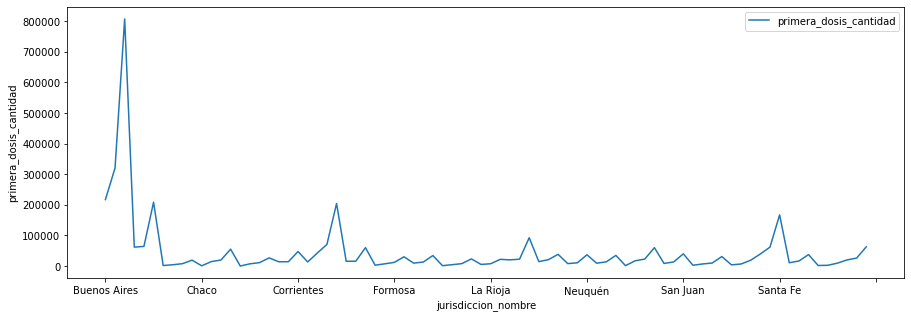

In [58]:
# series apiladas
data.plot(x='jurisdiccion_nombre', y='primera_dosis_cantidad',figsize=(15,5))
plt.xlabel("jurisdiccion_nombre")
plt.ylabel("primera_dosis_cantidad")

In [55]:
# Podemos usar el metodo iloc para seleccionar ciertas columnas y filas o usar el nombre de la columna
# una única columna
data.iloc[:,4]
#La otra forma
data['primera_dosis_cantidad']

0     217316
1     320184
2     807676
3      61842
4      64218
       ...  
75      2448
76      9501
77     20054
78     26104
79     62958
Name: primera_dosis_cantidad, Length: 80, dtype: int64

In [56]:
# tambien se puede hacer operaciones matemáticas de las columnas o filas
data['primera_dosis_cantidad']*5

0     1086580
1     1600920
2     4038380
3      309210
4      321090
       ...   
75      12240
76      47505
77     100270
78     130520
79     314790
Name: primera_dosis_cantidad, Length: 80, dtype: int64